In [27]:
# Import Libraries

!pip install pandas 
!pip install matplotlib 


In [28]:
# import and setup matplotlib 
%matplotlib inline 
 
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts


mp.style.use('ggplot')

#Import Primary Module 
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

#install seaborn and wordcloud
!pip install seaborn wordcloud

import seaborn as sns
import wordcloud 


# check for latest version of Matplotlib and seaborn
print("Matplotlib version:", mp.__version__) #>=2.0.0
print("Seaborn version:", sns.__version__)
print("Word Cloud version:", wordcloud.__version__)



Matplotlib version: 3.9.2
Seaborn version: 0.13.2
Word Cloud version: 1.9.4


In [ ]:
#Fetching Data

"""
1) Toolkits: The course heavily relies on pandas and Numpy for data wrangling, analysis, and visualization. 
The primary plotting library we will explore in the course is Matplotlib.

2) Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. 
The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for 
foreigners and nationals.

In this lab, we will focus on the Canadian Immigration data and use the already cleaned dataset.

You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill Data pre-processing 
with Pandas
"""
https://www.un.org/development/desa/pd/data/international-migration-flows




In [50]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699


In [52]:
df.shape

(195, 39)

In [54]:
#set Country as index
df.set_index('Country', inplace = True)


In [55]:
#Waffle Charts 

"""
A waffle chart is an interesting visualization that is normally created to display progress toward goals. 
It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, 
such as an Excel dashboard.
"""
# let's create a new dataframe for these three countries 

df_dns = df.loc[['Denmark', 'Norway', 'Sweden']]
df_dns.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [56]:
"""
Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. 
Therefore, we will learn how to create them from scratch.
"""
#Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.
dns_total = df_dns["Total"].sum()
print("dns_total:", dns_total, "\n")
print("values of df_dns[Total]:", df_dns["Total"], "\n")
catagory_proportion = df_dns["Total"]/dns_total
catagory_proportion

dns_total: 12094 

values of df_dns[Total]: Country
Denmark    3901
Norway     2327
Sweden     5866
Name: Total, dtype: int64 



Country
Denmark    0.322557
Norway     0.192409
Sweden     0.485034
Name: Total, dtype: float64

In [60]:
pd.DataFrame({"catagory_proportion" : catagory_proportion})

,catagory_proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


In [62]:
# Step 2. The second step is defining the overall size of the waffle chart.

width = 40
height = 10
total_numof_tiles = width * height 
print(f'total number of tiles are {total_numof_tiles}')

total number of tiles are 400


In [64]:
# Step 3. The third step is using the proportion of each category to determe it respective number of tiles

# compute the number of tiles for each category
Tiles_per_cataogory = (catagory_proportion * total_numof_tiles).round().astype(int)
pd.DataFrame({"Number of tiles":Tiles_per_cataogory})



,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


In [65]:
"""
Based on the calculated proportions, Denmark will occupy 129 tiles of the waffle chart, Norway will occupy 77 tiles, 
and Sweden will occupy 194 tiles.
"""
# Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.


# initialize the waffle chart as an empty matrix

waffle_chart = np.zeros((height, width), dtype= np.uint) # this line of code (once corrected) creates an empty grid (matrix) of a specified height and width, filled with zeros, and ready to be populated with values to represent the different categories of your waffle chart. Each "cell" in this grid will

# define indices to loop through waffle chart
catagoary_index = 0
tile_index = 0

#Populate the waffle chart 
for col in range(width):
    for row in range(height):
        tile_index += 1
        
        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(Tiles_per_cataogory[0:catagoary_index]):
            # ...proceed to the next category
            catagoary_index += 1
    
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = catagoary_index

print("wafffle Chart Populated")

            
        
        
        



wafffle Chart Populated


In [66]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 640x480 with 0 Axes>

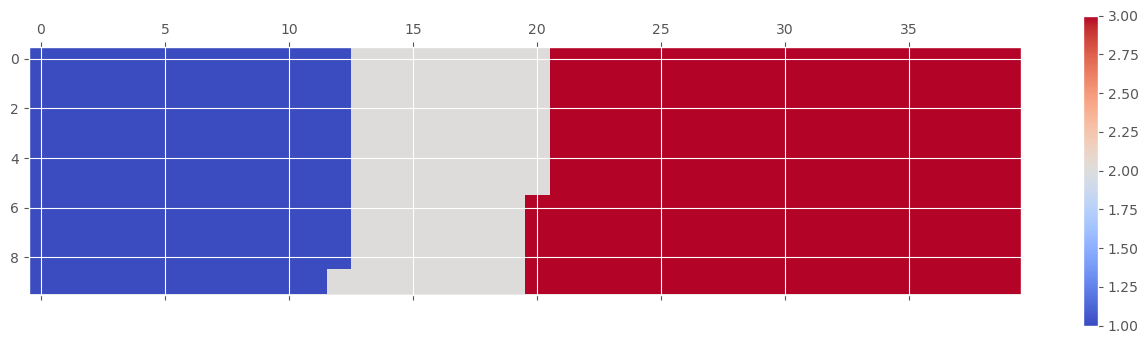

In [67]:
#Step 5. Map the waffle chart matrix into a visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()
plt.show()



<Figure size 640x480 with 0 Axes>

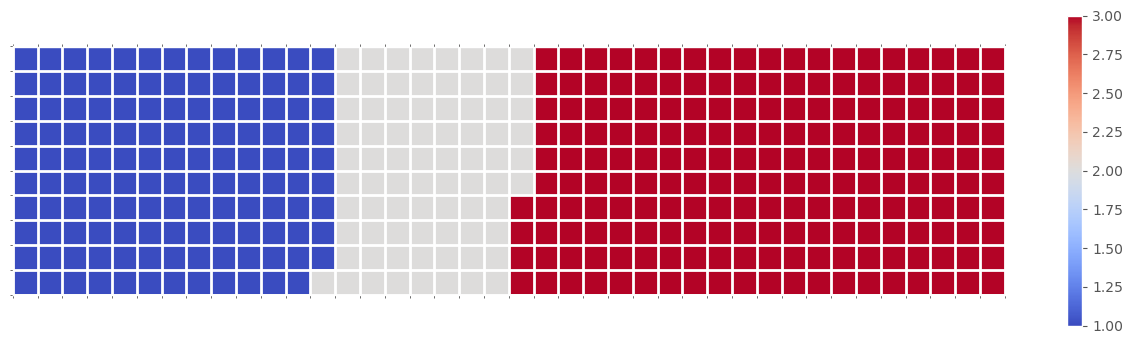

In [68]:
#Step 6. Prettify the chart.
fig = plt.figure()

colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()


#get the axis 
ax = plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

# add gridlines based on minor ticks
ax.grid(which = 'minor', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])
plt.show()

/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/206564377.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/206564377.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/206564377.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

<Figure size 640x480 with 0 Axes>

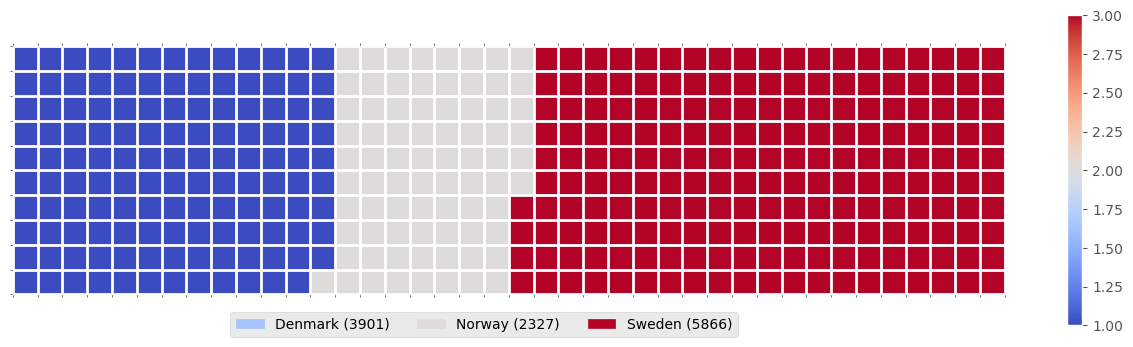

In [69]:
#Create a legend and add it to chart.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/443423786.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/443423786.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + value_sign + str(values[i]) + ')'
/var/folders/13/hkr16drx1qlf73zsss9wystw0000gn/T/ipykernel_4912/443423786.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame be

<Figure size 640x480 with 0 Axes>

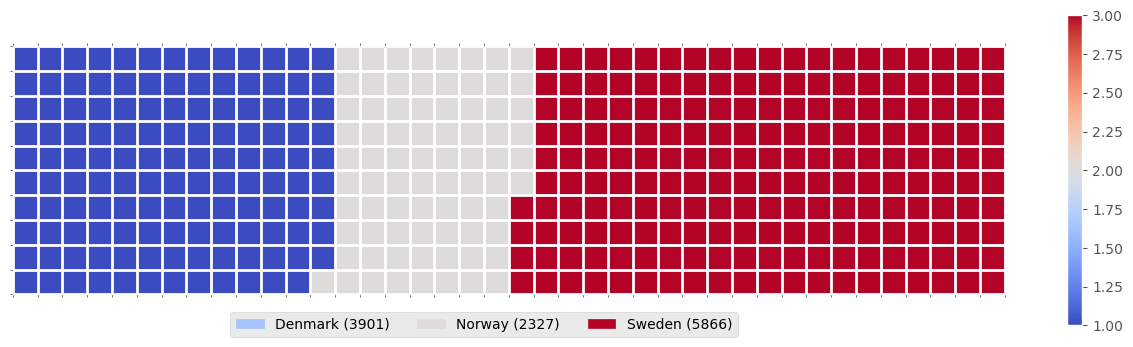

In [70]:
"""
Now it would very inefficient to repeat these seven steps every time we wish to create a waffle chart. So let's combine all seven steps 
into one function called create_waffle_chart. This function would take the following parameters as input:

categories: Unique categories or classes in dataframe.
values: Values corresponding to categories or classes.
height: Defined height of waffle chart.
width: Defined width of waffle chart.
colormap: Colormap class
value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a 
value such as %, $, and so on. value_sign has a default value of empty string.
"""

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()


#Now to create a waffle chart, all we have to do is call the function create_waffle_chart. Let's define the input parameters:

width = 40 # width of chart
height = 10 # height of chart

categories = df_dns.index.values # categories
values = df_dns['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class


#And now let's call our function to create a waffle chart

create_waffle_chart(categories, values, height, width, colormap)

In [71]:
# There seems to be a new Python package for generating waffle charts called PyWaffle,

# Let's create the same waffle chart with pywaffle now

!pip install pywaffle 

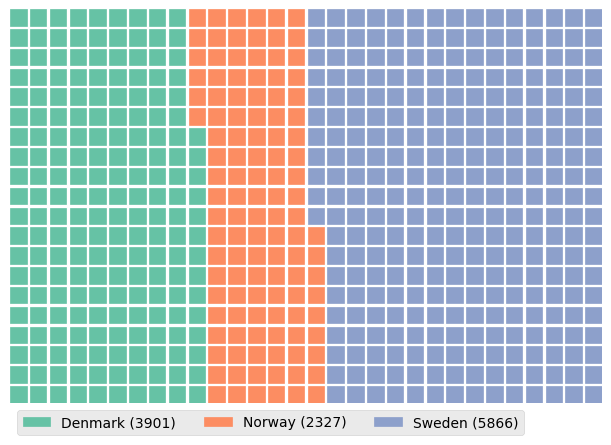

In [72]:
#import Waffle from pywaffle

from pywaffle import Waffle 

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle, 
                 rows = 20, columns = 30,  #pass the number of rows and columns for the waffle 
                 values = df_dns["Total"], #pass the data to be used for display
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dns.index.values, df_dns.Total)], 'loc' : 'lower left',
                                                                  'bbox_to_anchor':(0, -0.1), 'ncol' :3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )
plt.show()



In [73]:
#Create a Waffle chart to dispaly the proportiona of China and Inida total immigrant contribution.

df_InCh = df.loc[['India', 'China']]
df_InCh

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


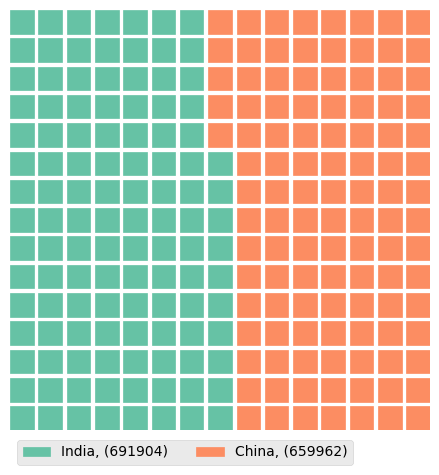

In [74]:
fig = plt.figure(FigureClass = Waffle, rows = 15, columns = 15, values = df_InCh["Total"], 
                 legend = {'labels':[f"{i}, ({j})" for i, j in zip(df_InCh.index.values, df_InCh.Total)],
                           'loc': 'lower left', 'bbox_to_anchor':(0, -0.1), 'ncol' : 3}
                )
plt.show()

In [75]:
# WORD CLOUDS

"""
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data 
(such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating word clouds. The package, called word_cloud was developed by 
Andreas Mueller. You can learn more about the package by following this link.

Let's use this package to learn how to generate a word cloud for a given text document.

First, let's install the package.
"""
from wordcloud import WordCloud, STOPWORDS

print("WordCloud imported")



WordCloud imported


In [76]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [77]:
#Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

stopwords = set(STOPWORDS)

In [84]:
#Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

#if you get attribute error while generating worldcloud, upgrade Pillow and numpy using below code
#%pip install --upgrade Pillow 
#%pip install --upgrade numpy

# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud
alice_wc.generate(alice_novel)

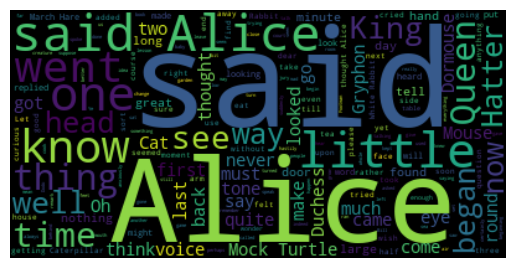

In [86]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

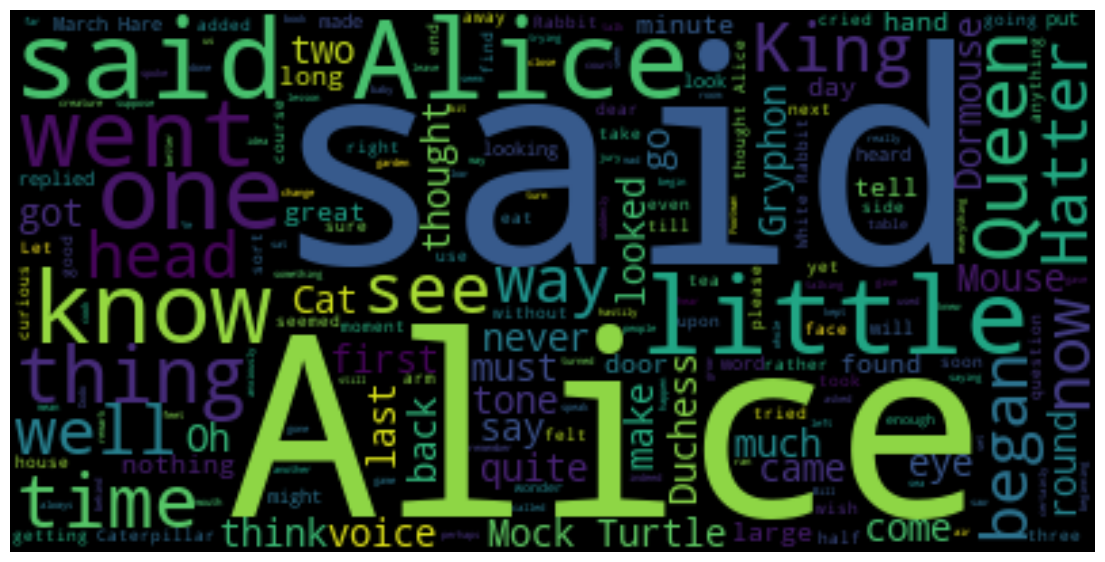

In [87]:
#Interesting! So in the first 2000 words in the novel, the most common words are Alice, said, little, Queen, and so on. Let's resize the cloud so that we can see the less frequent words a little better.

fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


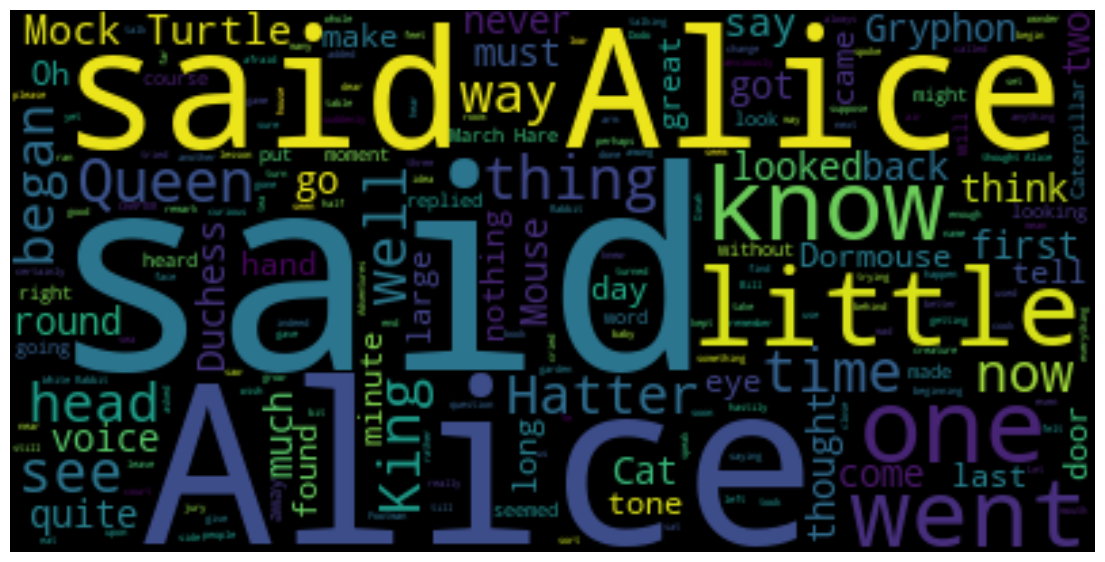

In [88]:
#Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
"""
Excellent! This looks really interesting! Another cool thing you can implement with the word_cloud package is superimposing the words 
onto a mask of any shape. Let's use a mask of Alice and her rabbit. We already created the mask for you, so let's go ahead and download 
it and call it alice_mask.png.
"""
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))


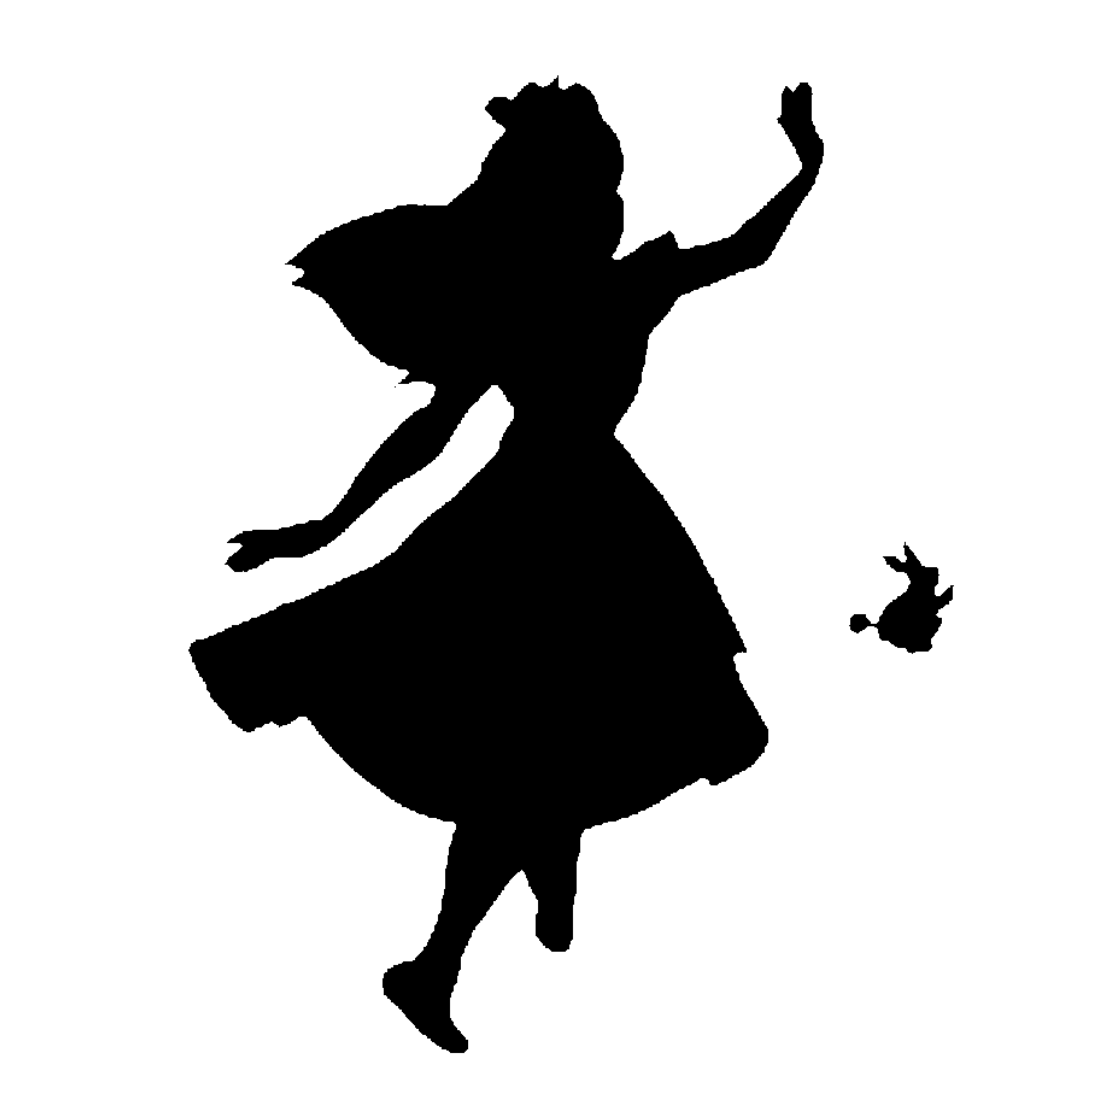

In [90]:

fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

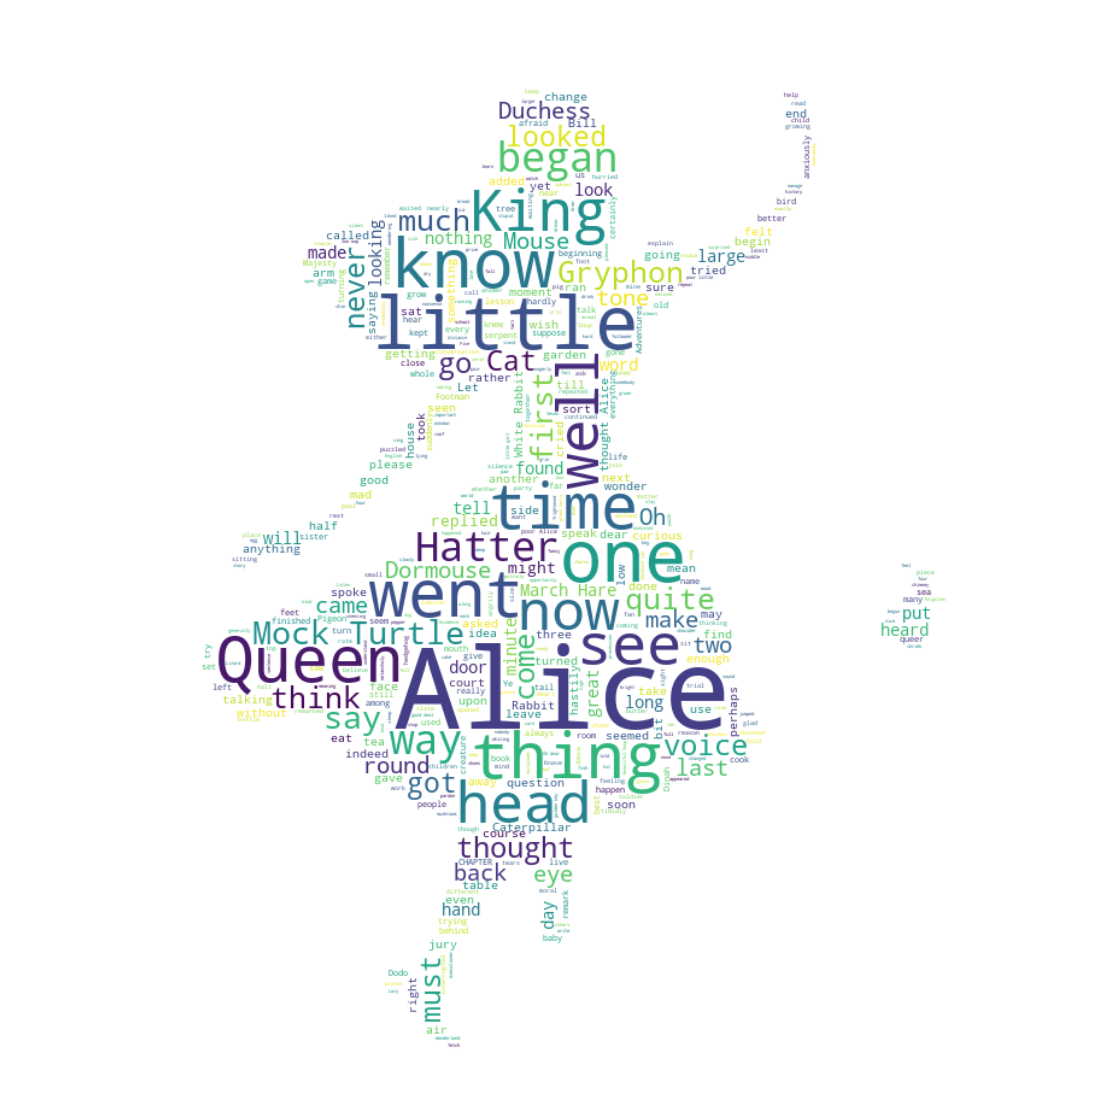

In [91]:
#Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
"""
Unfortunately, our immigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

Let's recall how our data looks like.
"""
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [93]:
total_immigration = df['Total'].sum()
total_immigration

6409153

In [94]:
#Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

max_words = 90
word_string = ''
for country in df.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [95]:
#We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.



# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


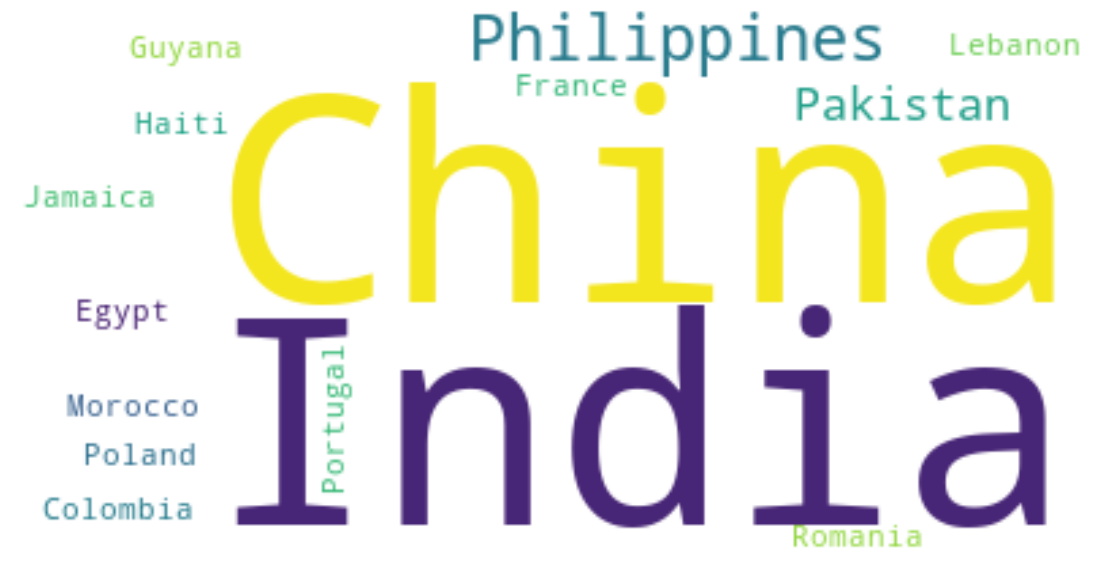

'\nAccording to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!\n'

In [96]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


"""
According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!
"""


In [97]:
# Plotting with Seaborn 
"""
Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical 
graphics. You can learn more about seaborn by following this link and more about seaborn regression plots by following this link.

In lab Pie Charts, Box Plots, Scatter Plots, and Bubble Plots, we learned how to create a scatter plot and then fit a regression line. 
It took ~20 lines of code to create the scatter plot along with the regression fit. In this final section, we will explore seaborn and 
see how efficient it is to create regression lines and fits using this library!
"""
#Categorical Plots
"""
In our data 'df_can', let's find out how many continents are mentioned
"""
df['Continent'].unique()


array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

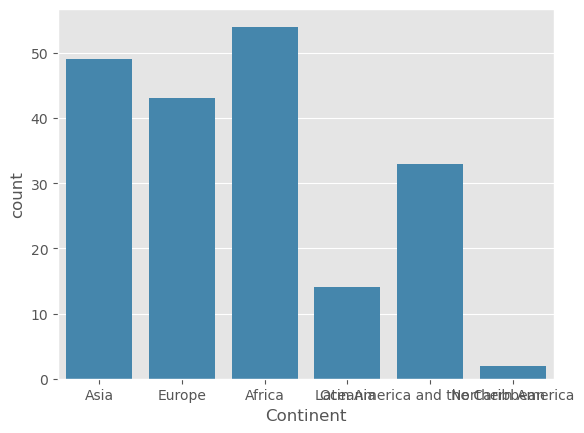

In [134]:
#countplot

"""
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 
Let's find the count of Continents in the data 'df' using countplot on 'Continent'
"""

sns.countplot(x='Continent', data = df)
plt.show()

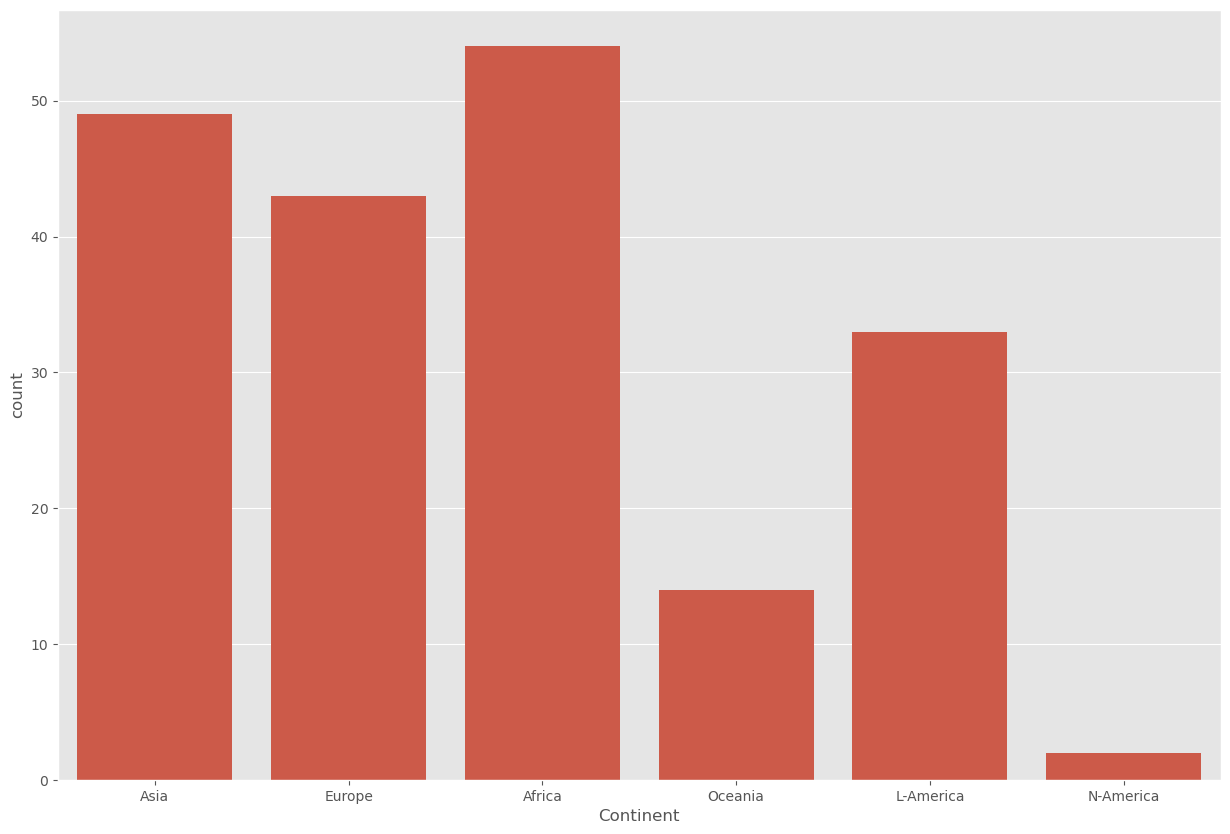

In [146]:
"""
The labels on the x-axis doesnot look as expected.
Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America",
and change the figure size and then display the plot again
"""

df_1 = df.replace('Latin America and the Caribbean', 'L-America')
df_1 = df_1.replace('Northern America', 'N-America')

plt.figure(figsize=(15,10))
sns.countplot(x='Continent', data = df_1)
plt.show()


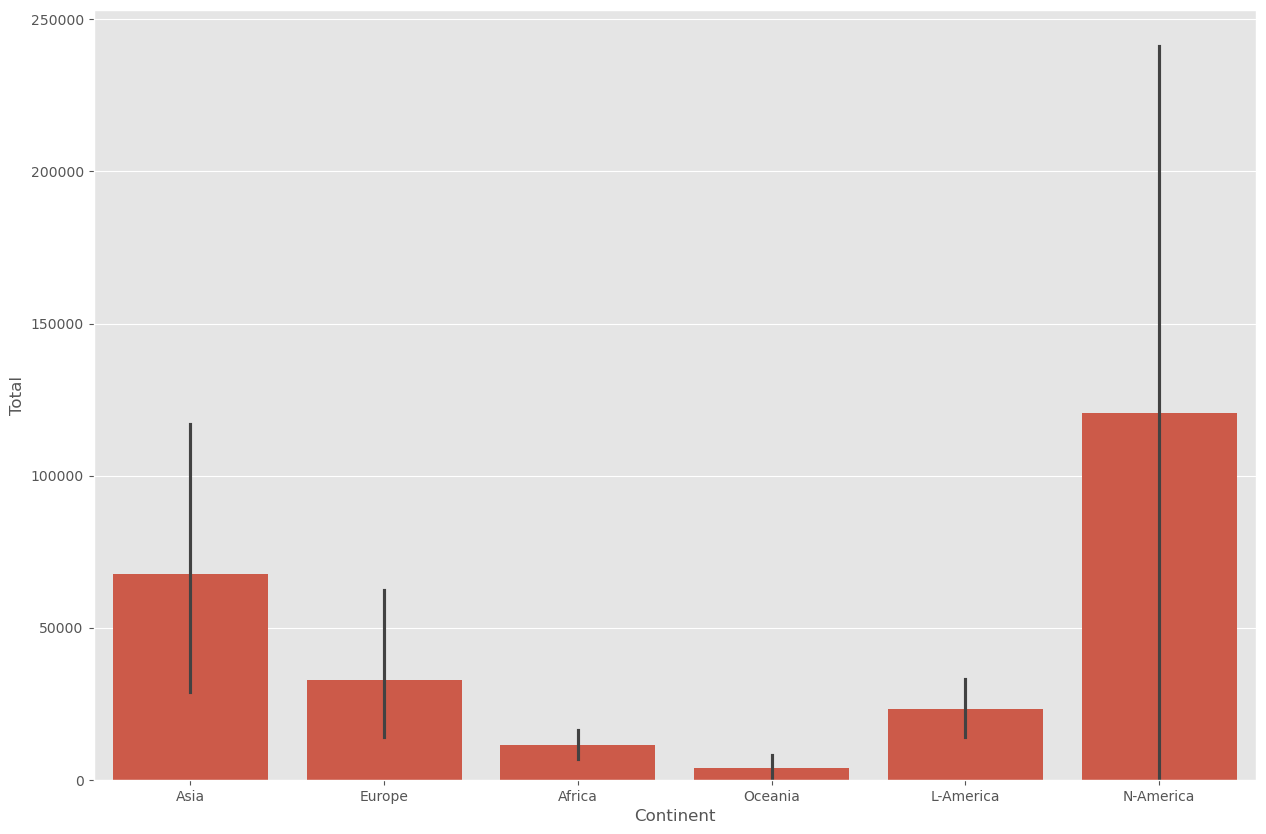

In [154]:
#Barplot
"""
This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals.
Let's plot the total immigrants Continent-wise
"""
plt.figure(figsize=(15,10))
sns.barplot(x = 'Continent', y = "Total", data = df_1)
plt.show()

In [156]:
#You can verify the values by performing the groupby on the Total and Continent for mean()


df_2 = df_1.groupby('Continent')['Total'].mean()
df_2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

In [158]:
#Regression Plot 

"""
With seaborn, generating a regression plot is as simple as calling the regplot function.
"""

years = list(map(str, range(1980, 2014)))

# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df[years].sum(axis = 0))

# change the years to type float (useful for regression later on)
df_total.index = df_total.index.map(float)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns = ['years', 'total']

df_total.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


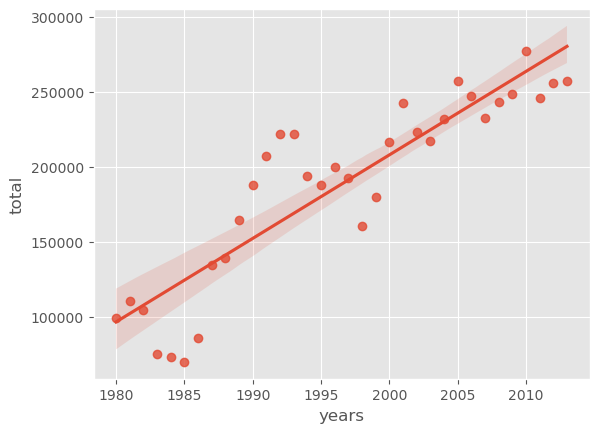

In [162]:
sns.regplot(x = 'years', y = 'total', data = df_total)
plt.show()

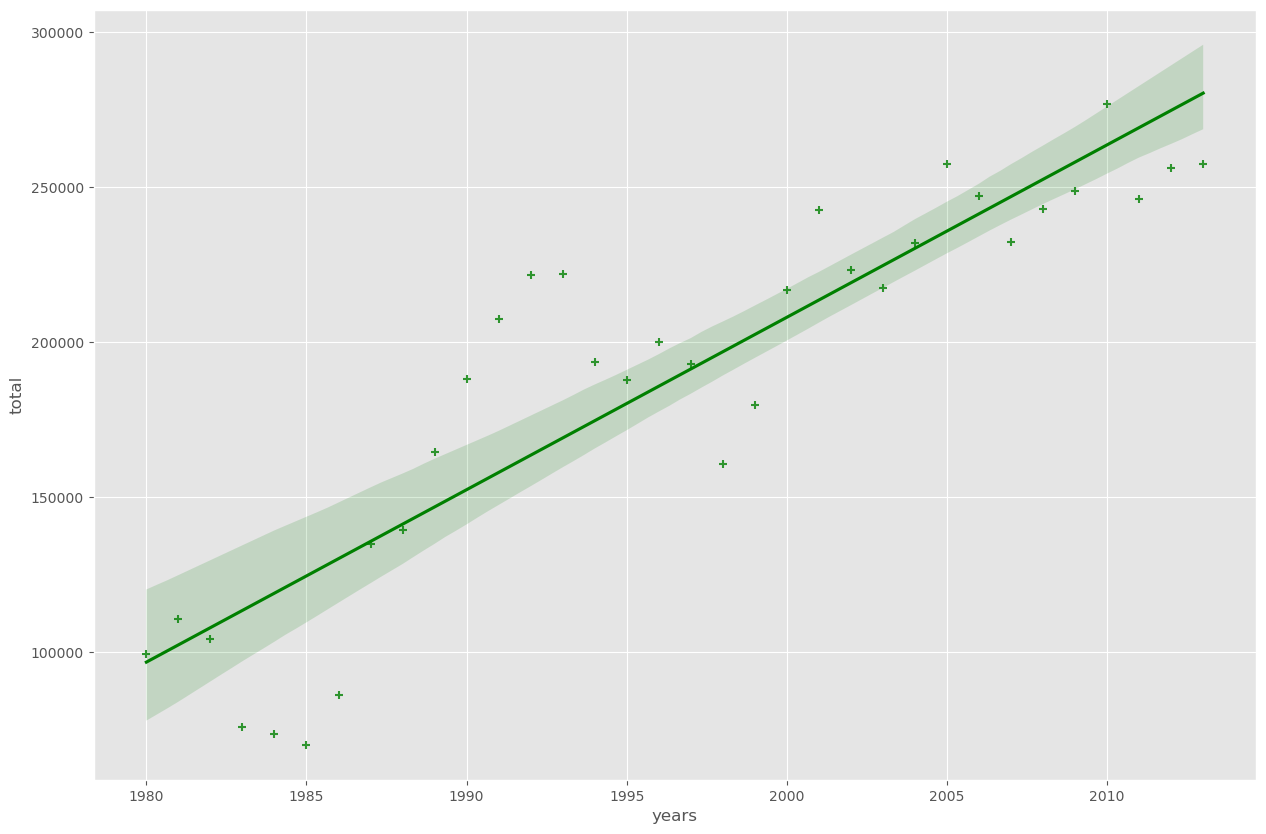

In [164]:
#You can always customize the marker shape, so instead of circular markers, let's use +.
#Let's blow up the plot a little so that it is more appealing to the sight.

plt.figure(figsize = (15,10))
sns.regplot(x ='years', y = 'total', marker = '+', color = 'green', data = df_total)
plt.show()

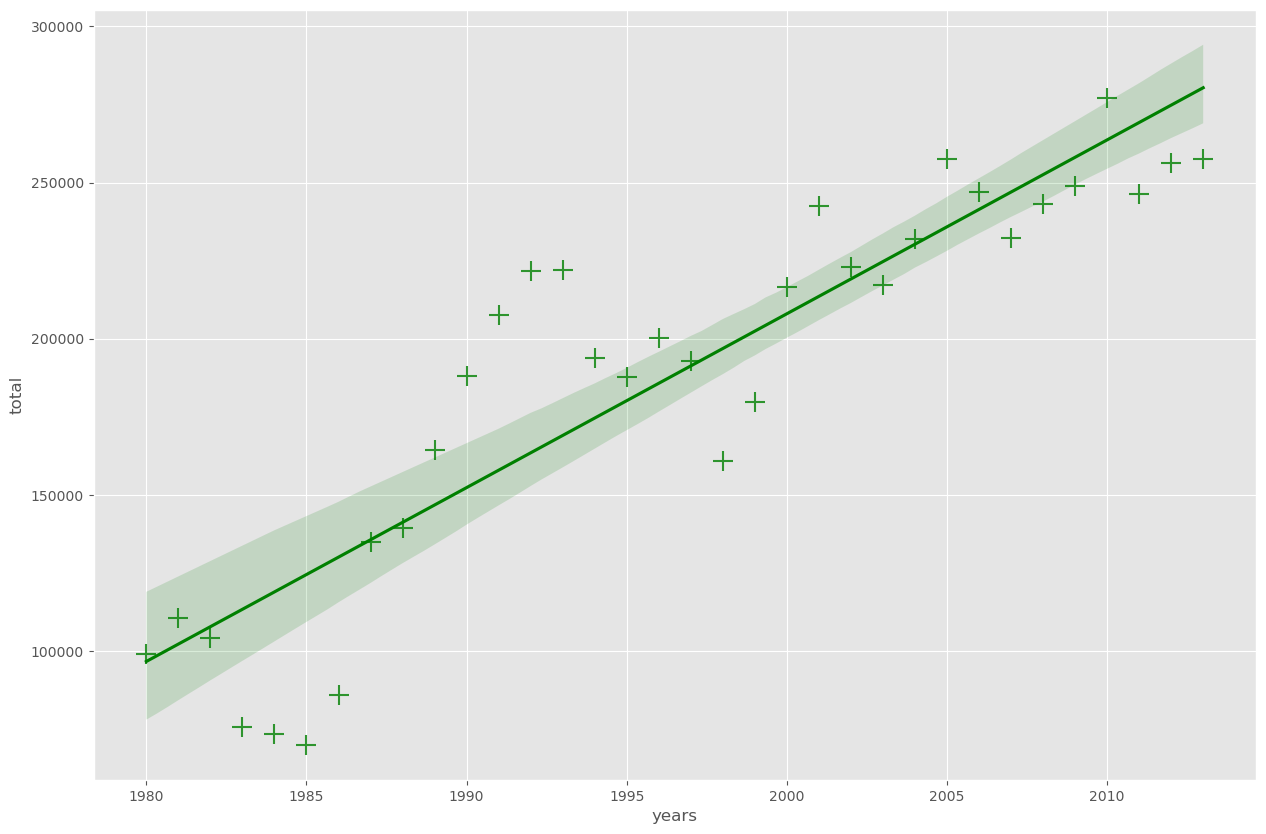

In [172]:
#And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


plt.figure(figsize = (15,10))
sns.regplot(x ='years', y = 'total', marker = '+', color = 'green', data = df_total, scatter_kws = {'s':200})
ax.set_title("Total number of immigrents")
ax.set(xlabel ='years', ylabel ='Total immigrents')
plt.show()

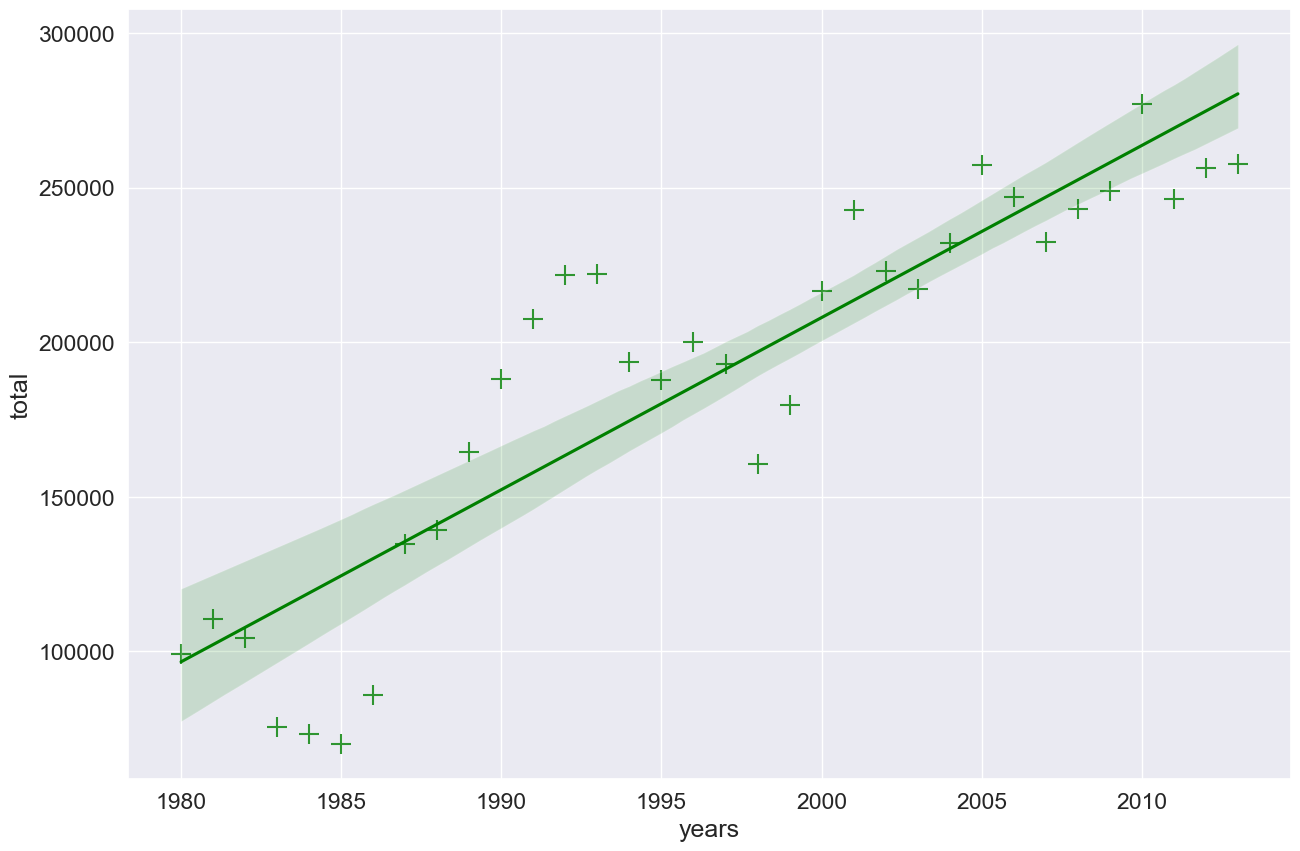

In [174]:
# And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!
plt.figure(figsize = (15,10))

sns.set(font_scale = 1.5)


sns.regplot(x ='years', y = 'total', marker = '+', color = 'green', data = df_total, scatter_kws = {'s':200})
ax.set_title("Total number of immigrents")
ax.set(xlabel ='years', ylabel ='Total immigrents')
plt.show()


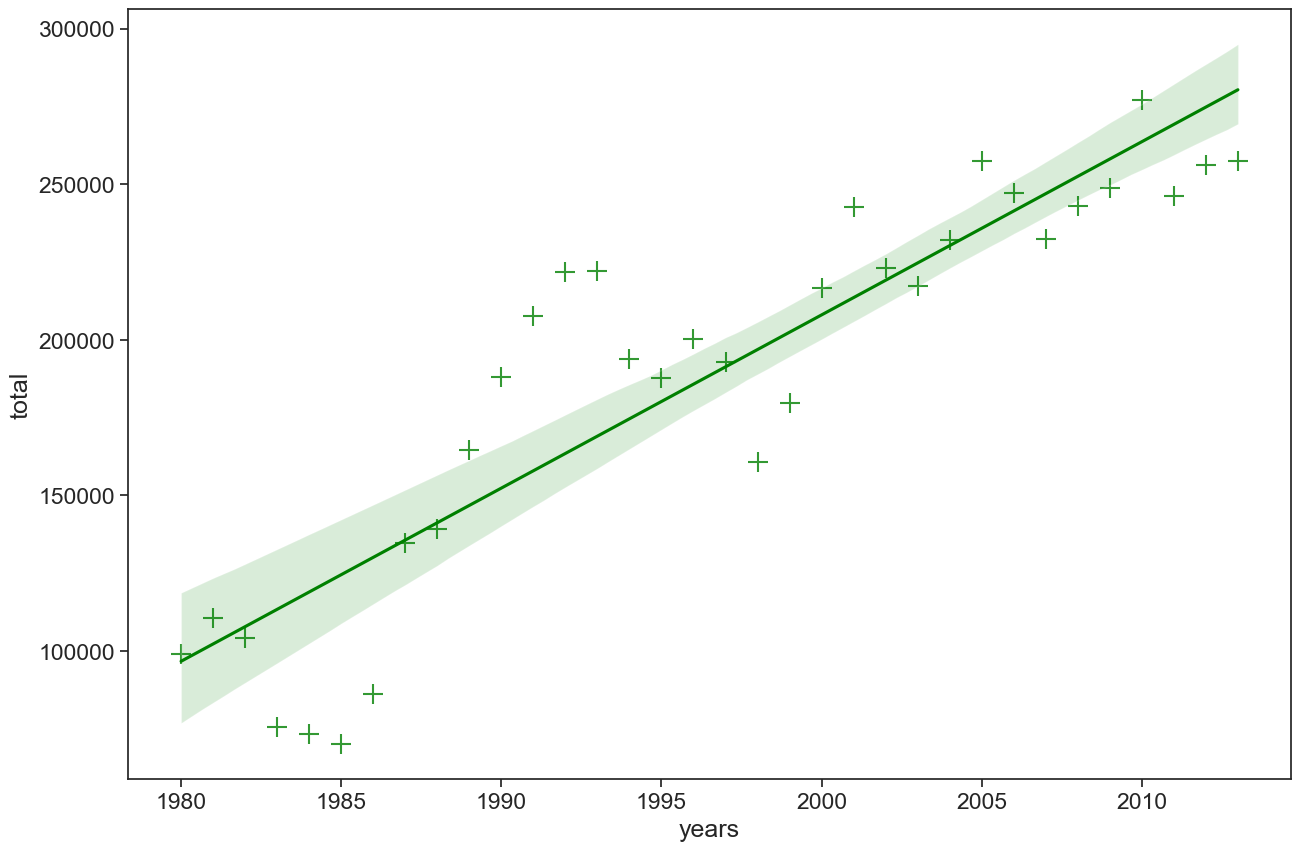

In [176]:
#If you are not a big fan of the purple background, you can easily change the style to a white plain background.

plt.figure(figsize = (15,10))

sns.set(font_scale = 1.5)

sns.set_style('ticks')


sns.regplot(x ='years', y = 'total', marker = '+', color = 'green', data = df_total, scatter_kws = {'s':200})
ax.set_title("Total number of immigrents")
ax.set(xlabel ='years', ylabel ='Total immigrents')
plt.show()

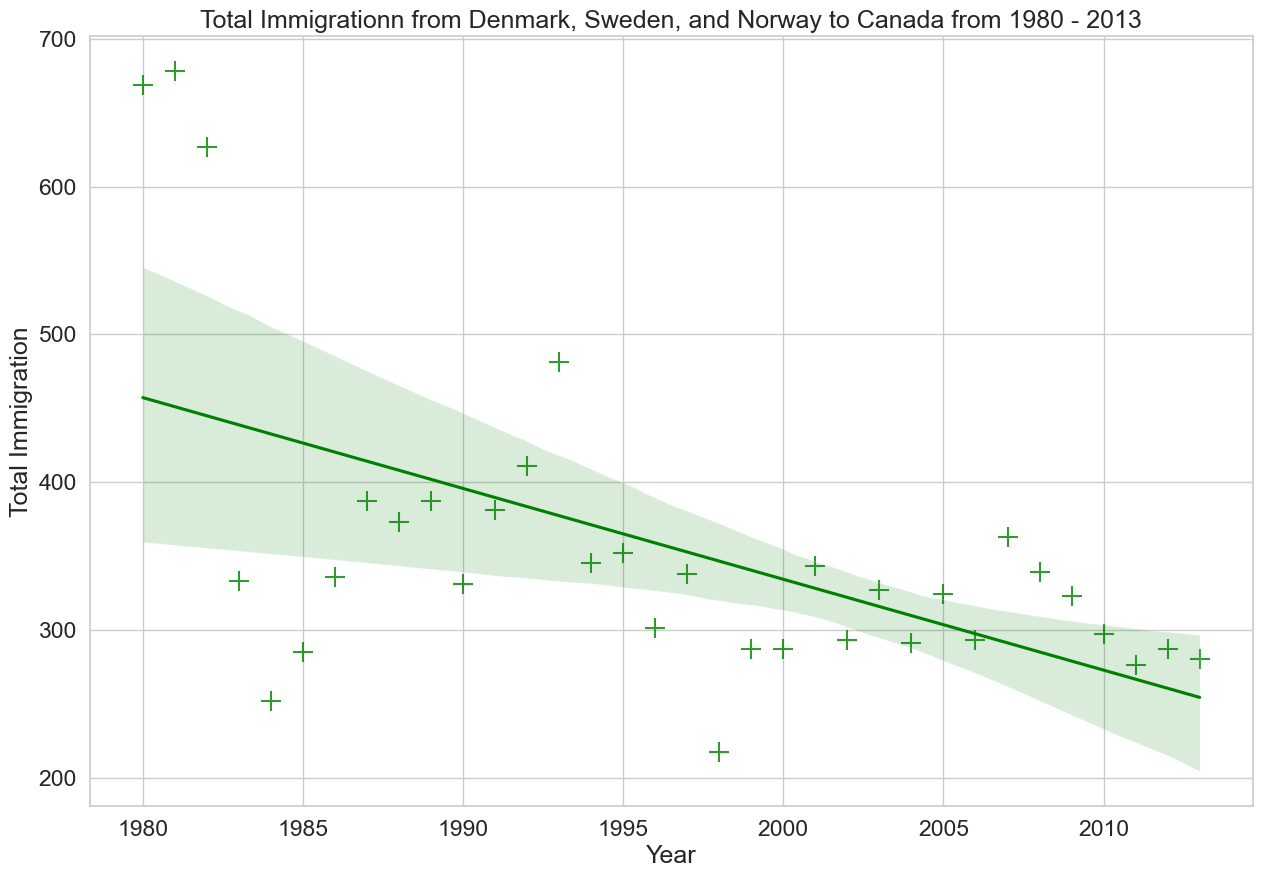

In [182]:
# Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

    
# create df_countries dataframe
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total1 = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total1.reset_index(inplace=True)

# rename columns
df_total1.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total1['year'] = df_total1['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total1, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


plt.show()